Partie 1 : Analyse + modèle KNN de base

a. Première description pour présenter les caractéristiques de la dataset

Importation des bibliothèques dont nous aurons besoin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, RobustScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

Importation du dataset et chargement des premières lignes du dataset

In [2]:

dataset = pd.read_excel('Insurance-data.xlsx',sheet_name='Base')
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


Le dataset contient sept variables réparties comme suit: quatre variables quantitatives (age, bmi, children & charge) et trois qualitatives (sex, smoker & region). Le jeu de données comporte les informations sur 1000 individus

Verification des valeurs manquantes

In [3]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Statistique descriptive

In [4]:
dataset.describe()

,age,bmi,children,charges
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.640000,30.865565,1.080000,13099.629425
std,14.169586,6.046396,1.198765,11994.129978
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.600000,0.000000,4719.683425
50%,40.000000,30.590000,1.000000,9286.850750
75%,52.000000,35.112500,2.000000,16073.095438
max,64.000000,50.380000,5.000000,63770.428010


Le dataset ne contient aucune données manquantes. Il ne serait donc pas utile dans ce cas d'utiliser des méthodes d'imputation de données.

b.Analyse descriptive des données

Analyse descriptive univarié des variables quantitatives 

In [5]:
# Etraxtion des variables quantitative
num_features = ['age','bmi','children','charges']

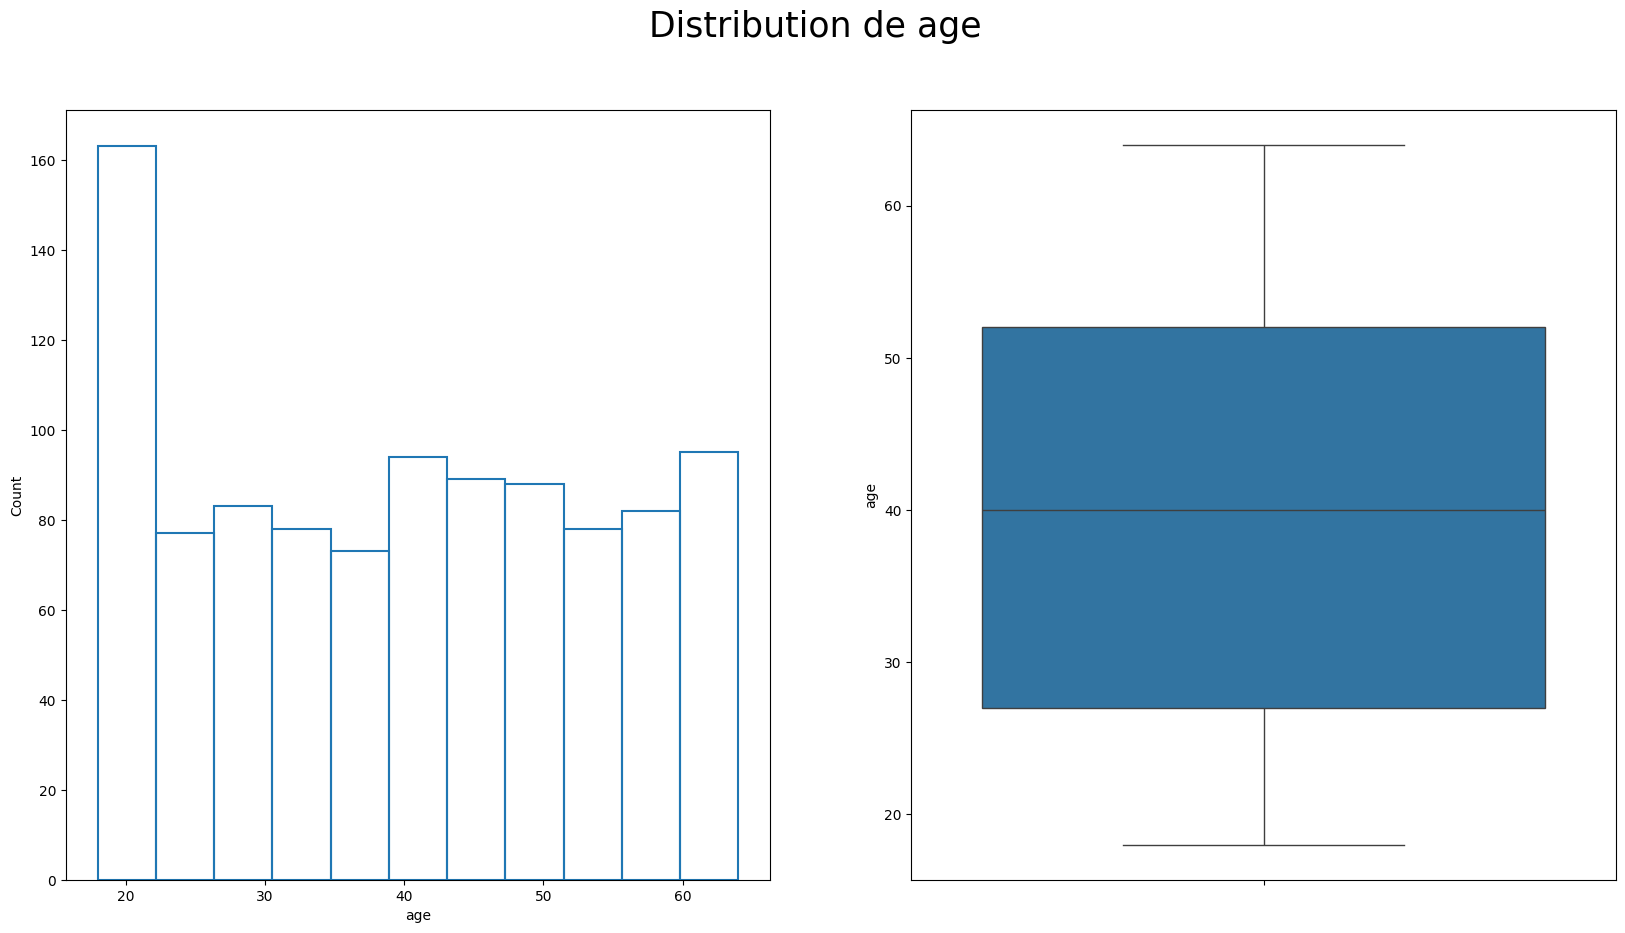

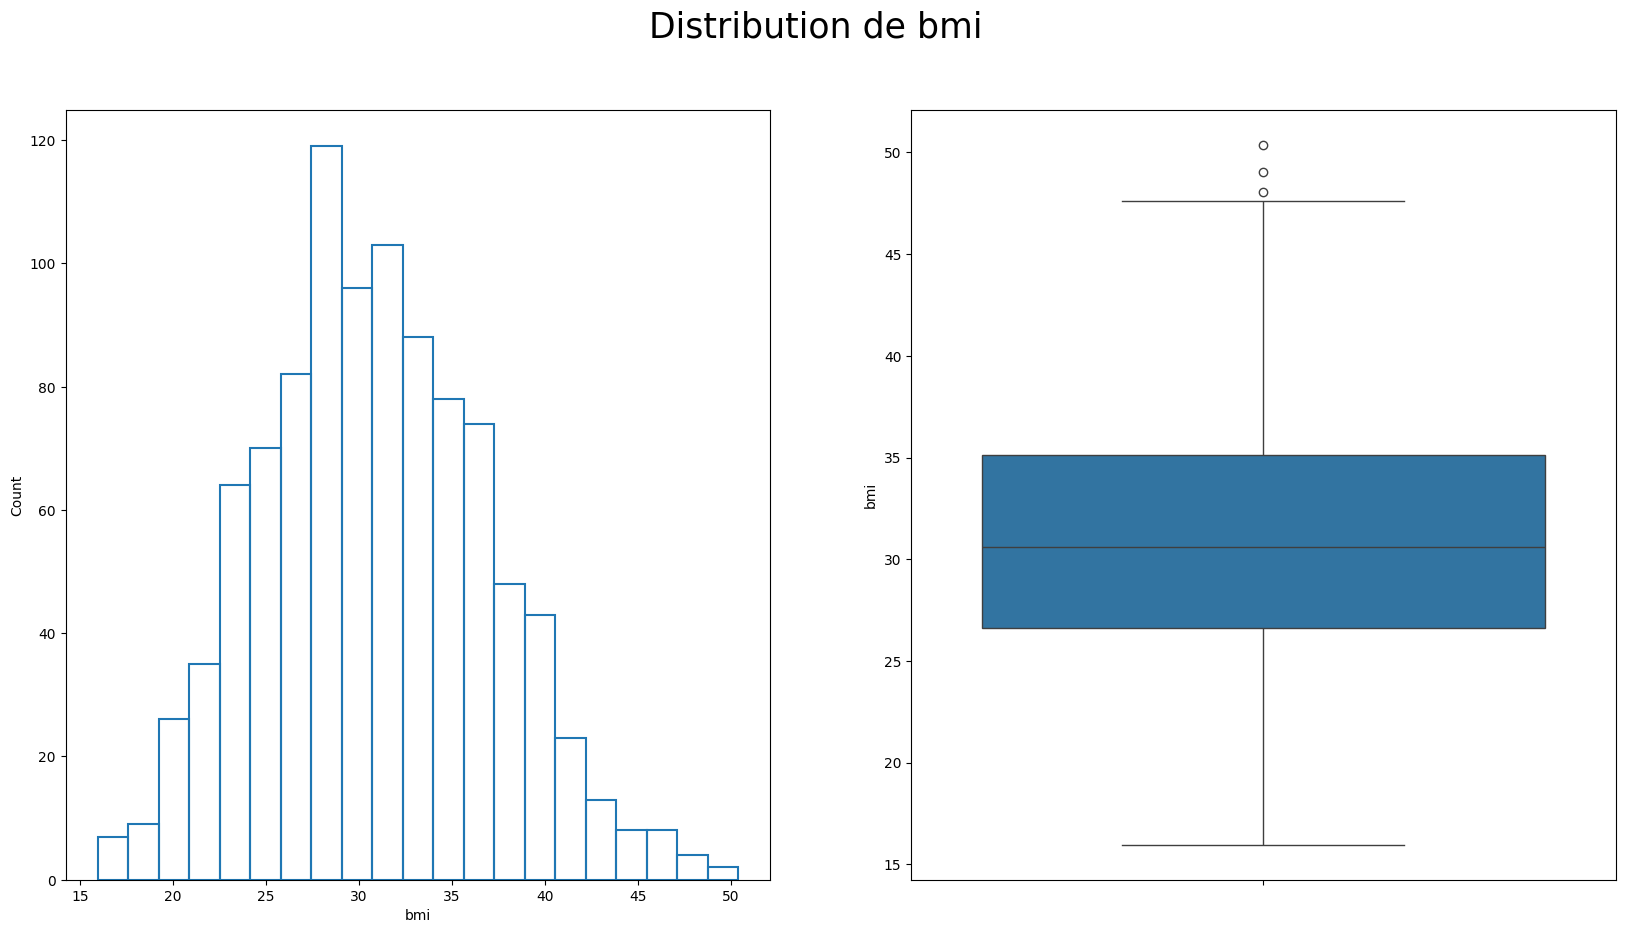

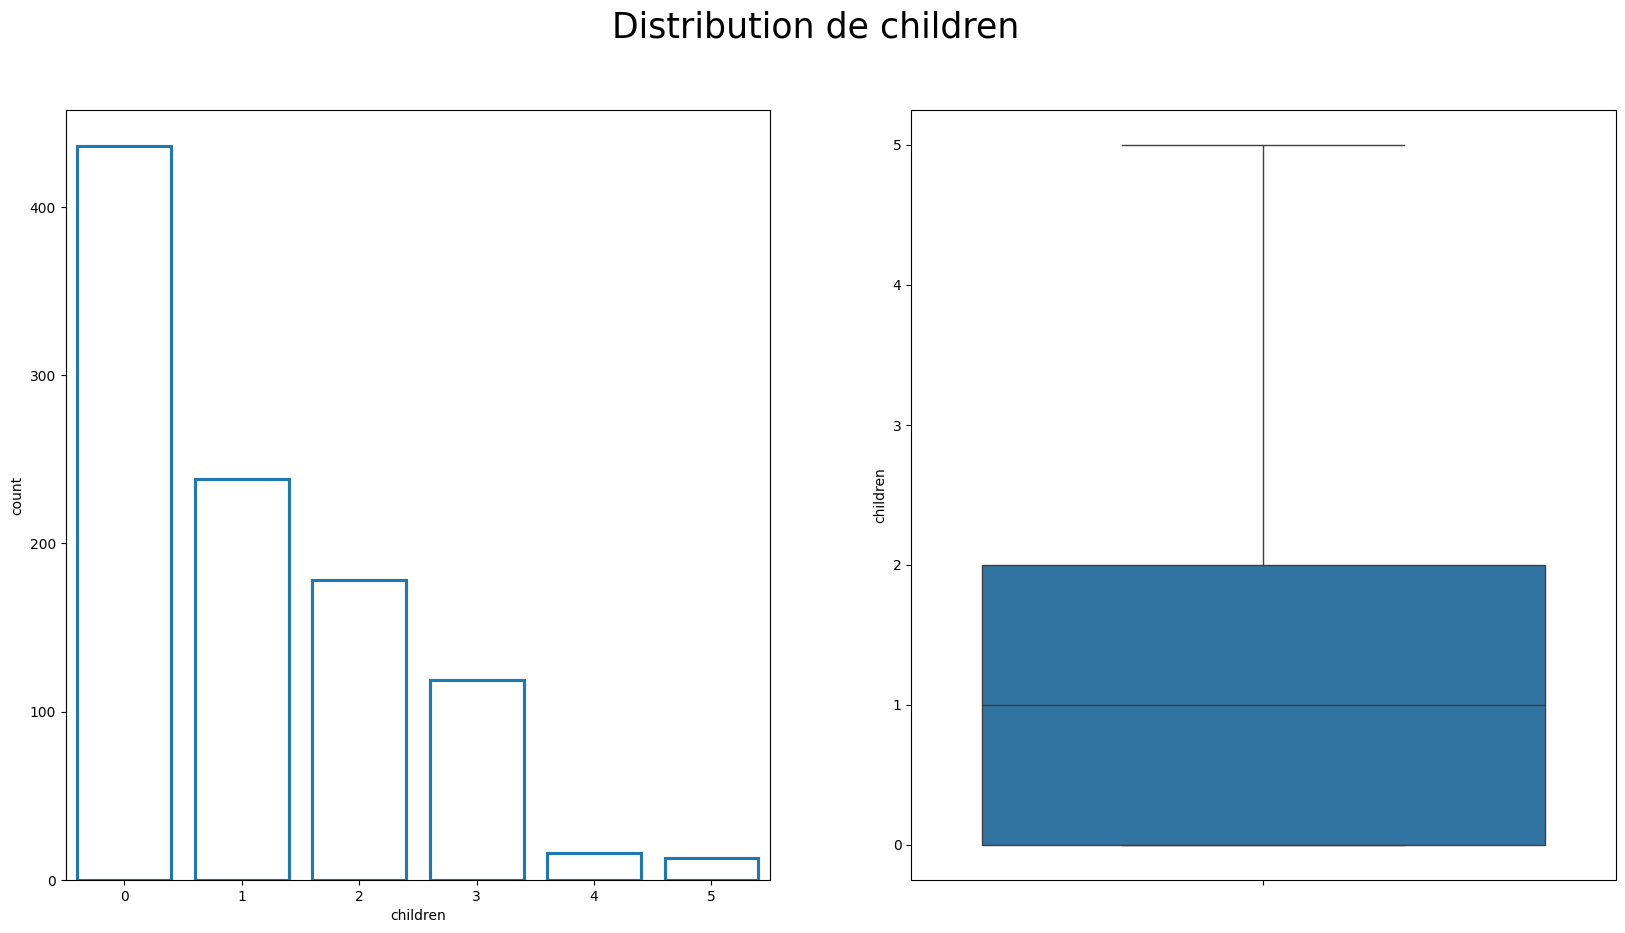

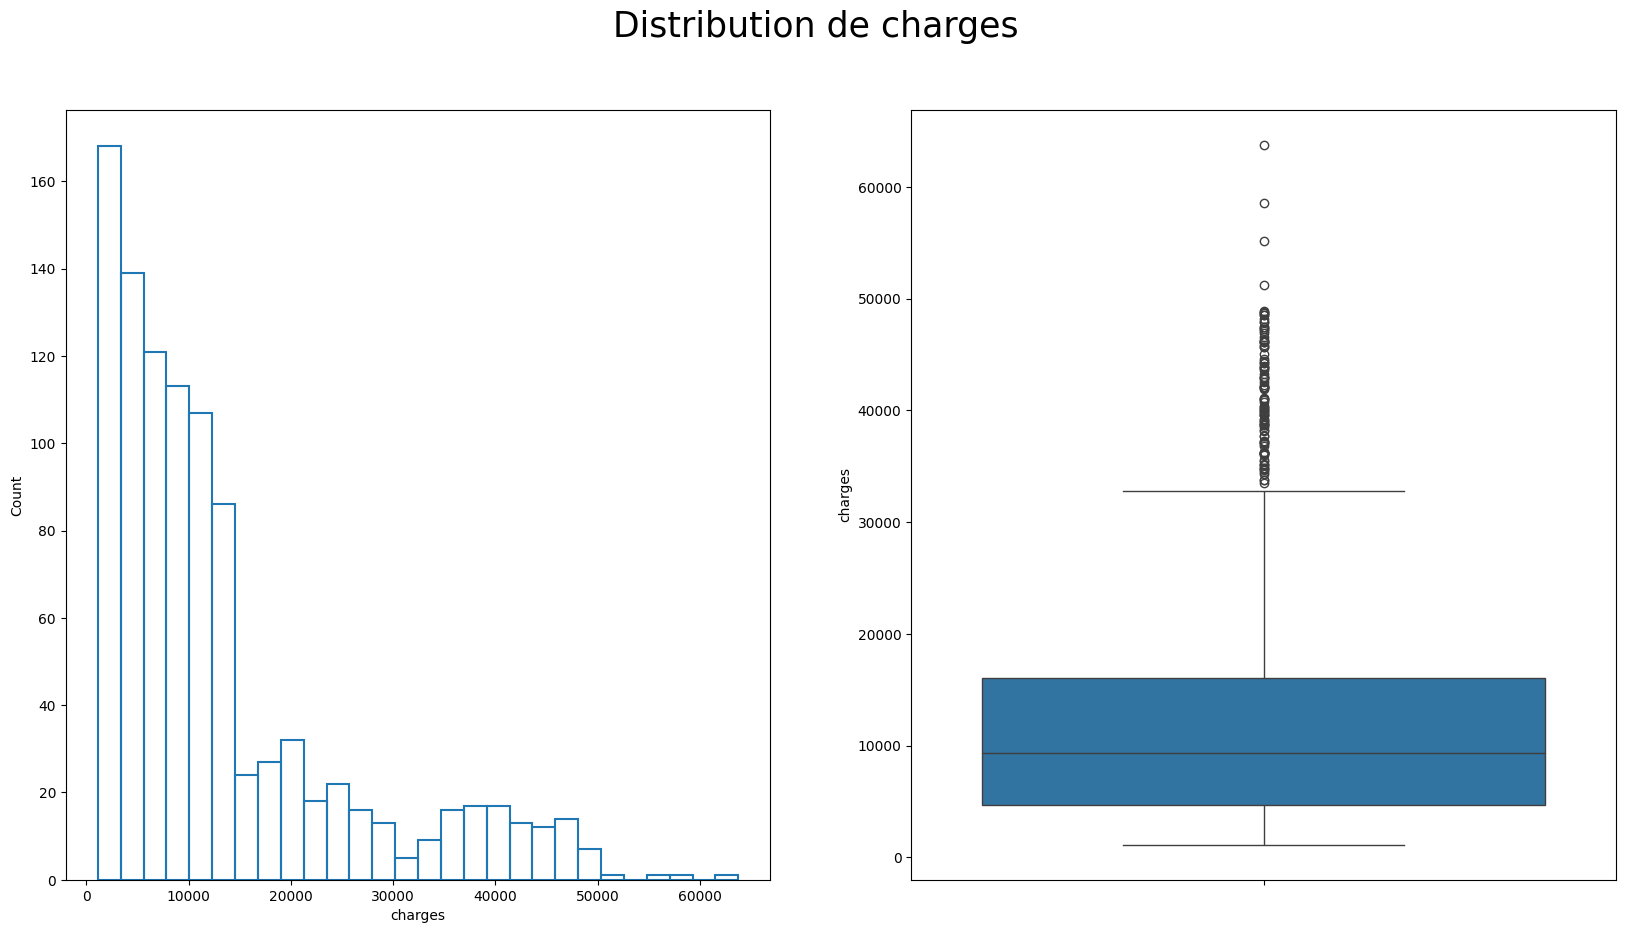

In [6]:
# Graphes des variables quantitatives
for _feature in num_features:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    fig.suptitle(f'Distribution de {_feature}',fontsize=25)
    if dataset[_feature].nunique() > 10:
        sns.histplot(data=dataset, x=_feature, fill=False,ax=ax1)
    else:
        sns.countplot(data=dataset,x=_feature, fill=False,ax=ax1)
    sns.boxplot(dataset,y=_feature,ax=ax2);
    fig.savefig(f"./export/distribution_{_feature}.png")

Le tableau ci-dessous présente quelques paramètres de position (minimum `min`, quartiles `25%, 50%, 75%`, moyenne `mean`, maximum `max`) et l'écart-type `std` à savoir sur l'ensemble des variables quantitatives de notre base de données.

* **Age**

Dans le jeu de données, les individus les plus jeunes et âgés ont respectivement 18 et 64 ans. En moyenne, les assurés de la compagnie ont 39,64 ans. Cet âge se rapproche de la médiane (40 ans). La moitié des assurés a donc soit moins de 40 ans ou plus de 40 ans. Le dataset est constitué en majorité d'individus jeunes ayant entre 16 et 23 ans.

* **BMI (Indice de Masse Corporelle IMC)**

Les assurés ont un indice de masse corporelle minimum de 15,96 $kg/m^2$ et un maximum de 50,38 $kg/m^2$. De ce fait, des personnes sont aussi bien en surpoids qu'en sous-poids au sein des individus considérés. L'IMC moyen est 30,87 et l'IMC médian 30,59 $kg/m^2$. Plus de la moitié des clients de la compagnie d'assurance sont en surpoids car l'IMC maximal recommandé est 24,9 $kg/m^2$.
L'IMC suit une distribution normale. On remarque que le nombre des individus croît avec l'IMC avant d'atteindre un pic entre 27 et 29 $kg/m^2$ avant de redescendre. Aussi, trois individus présentent des IMC extrêmes.

* **Children**

En moyenne et pour la moitié, les assurés de la compagnie ont un enfant couverts ou à charge. Toutefois, certains peuvent en avoir jusqu'à 5. Sur la base de la figure, le nombre d'assurés décroit au fur et à mesure que le nombre d'enfants augmentent.

* **Charges**

Au minimum, les frais médicaux facturés sont de $\$1 121,87$. En moyenne, ces frais s'élèvent à $\$13 099,62$. Néanonmoins pour la moitié des assurés, les frais médicaux sont de $\$9 286,85$. Le maximum facturés est $\$63 770,43$.
Au fur et à mesure que les frais médicaux facturés par l'assurance maladie augmentent, moins il y a de bénéficiaires.

<Axes: xlabel='bmi', ylabel='charges'>

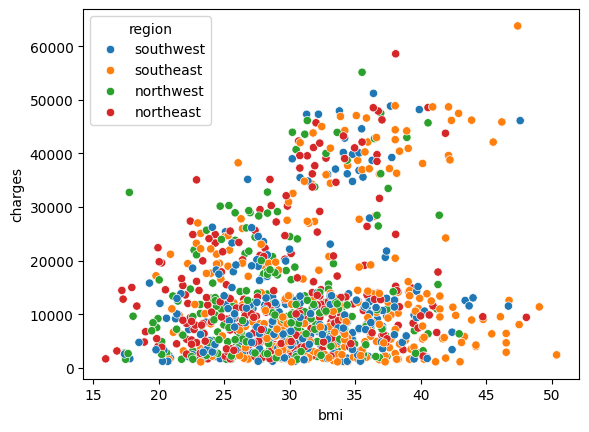

In [7]:
sns.scatterplot(dataset,y='charges',x='bmi',hue='region')

In [8]:
dataset.groupby('region')['charges'].agg('mean').sort_values(ascending=False)

region
southeast    14138.838243
northeast    13731.435846
northwest    12291.722631
southwest    12040.900870
Name: charges, dtype: float64

Analyse descriptive univarié des variables qualitatives

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extraction des variables qualitatives
cat_features = ['sex','smoker','region']
dataset[cat_features].describe()

,sex,smoker,region
count,1000,1000,1000
unique,2,2,4
top,male,no,southeast
freq,505,803,278


* **Sex**

Les clients de la maison d'assurance ont deux sexes. Ils sont en majorité de sexe masculin (676).

* **Smoker**

Le statut de fumeur des assurés est fait de deux catégories "Fumeur" et "Non". 1064 personnes sont non fumeurs.

* **Region**

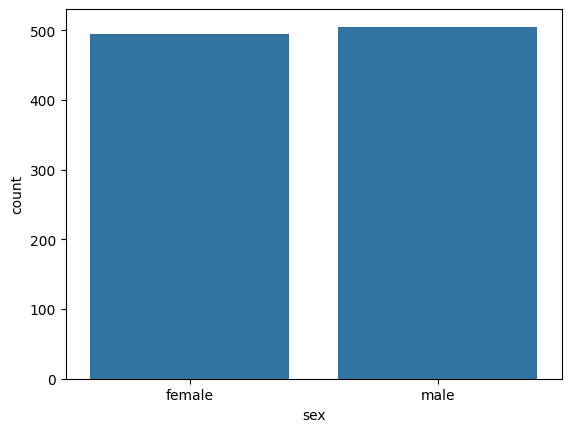

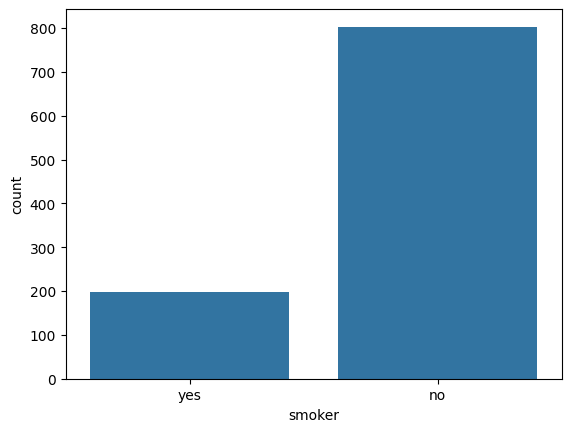

In [10]:

sns.countplot(x='sex', data=dataset)
plt.show()

sns.countplot(x='smoker', data=dataset)
plt.show()

In [11]:
dataset[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.115547,0.029630,0.331909
bmi,0.115547,1.000000,0.025439,0.187547
children,0.029630,0.025439,1.000000,0.050799
charges,0.331909,0.187547,0.050799,1.000000


Interprétation du BMI

In [12]:
pd.cut(dataset['bmi'],bins=[0,18.5,24.9,30,100],labels=['sous-poids','normal','surpoids','obésité'])

0      surpoids
1       obésité
2       obésité
3        normal
4      surpoids
         ...   
995      normal
996     obésité
997     obésité
998     obésité
999    surpoids
Name: bmi, Length: 1000, dtype: category
Categories (4, object): ['sous-poids' < 'normal' < 'surpoids' < 'obésité']

Catégorisons le BMI et apliquons la fonction au BMI

In [13]:

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'sous-poids'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    elif 24.9 <= bmi < 30:
        return 'surpoids'
    else:
        return 'obésité'


dataset['bmi_category'] = dataset['bmi'].apply(categorize_bmi)

print(dataset[['bmi', 'bmi_category']].head())


      bmi bmi_category
0  27.900     surpoids
1  33.770      obésité
2  33.000      obésité
3  22.705       normal
4  28.880     surpoids


Analyse descriptive bivariée entre la variable cible et les variables qualitatives 

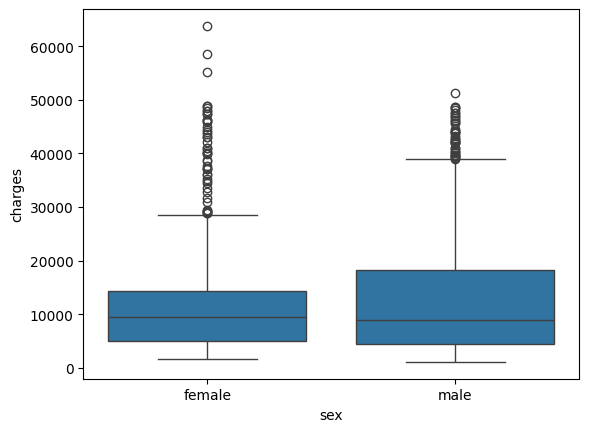

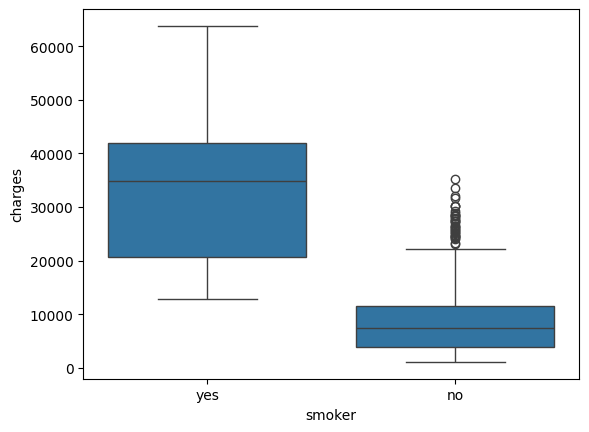

In [14]:
sns.boxplot(x='sex', y='charges', data=dataset)
plt.show()

sns.boxplot(x='smoker', y='charges', data=dataset)
plt.show()


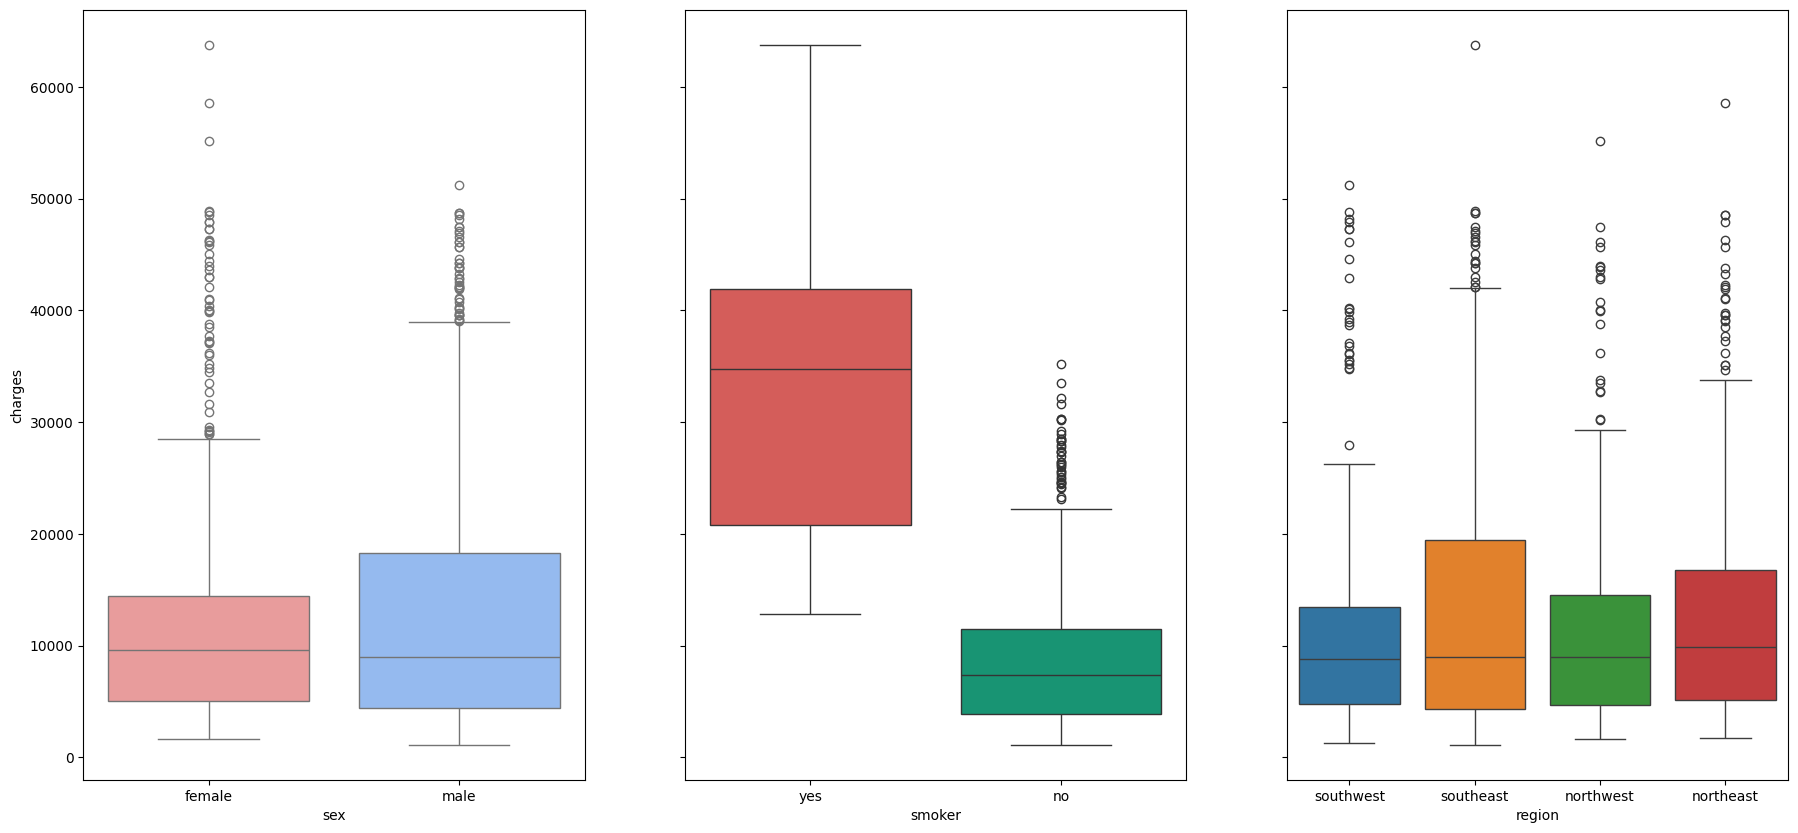

In [15]:
# Analyse bivariée entre la variable cible et les variables qualitatives
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True,figsize=(22,10))
sns.boxplot(dataset,y='charges',x='sex',hue='sex',palette=['#F58F8F','#86B7FE'],ax=ax1)
sns.boxplot(dataset,y='charges',x='smoker',hue='smoker',palette=['#E84A46','#04A87D'],ax=ax2)
sns.boxplot(dataset,y='charges',x='region',hue='region',ax=ax3)
fig.savefig(f"./export/distribution_{_feature}.png")

Analyse descriptive bivariée entre la variable cible et les variables quantitatives : Utilisation des nuages de points pour visualiser la relation entre les variables quantitatives et la variable cible

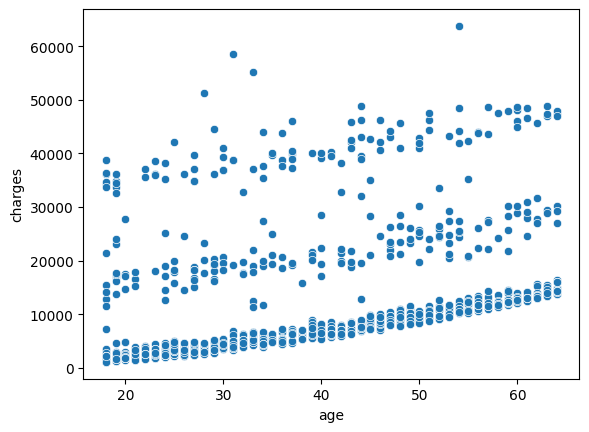

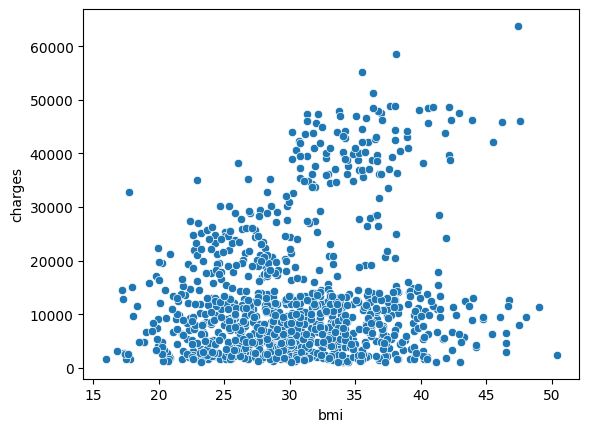

In [16]:
sns.scatterplot(x='age', y='charges', data=dataset)
plt.show()

sns.scatterplot(x='bmi', y='charges', data=dataset)
plt.show()


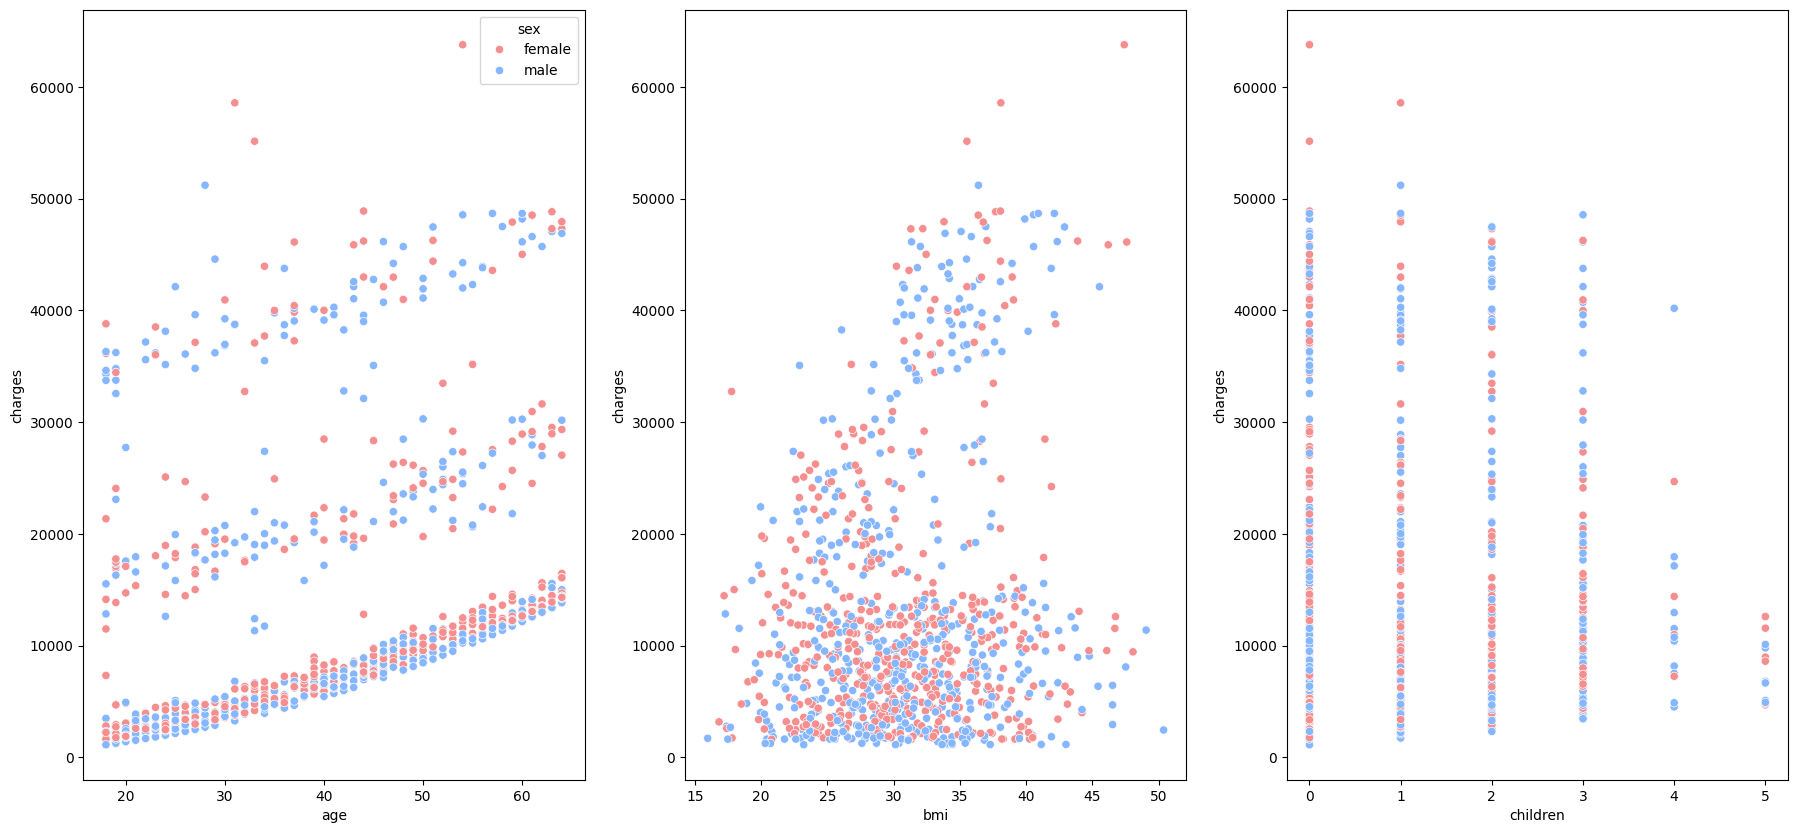

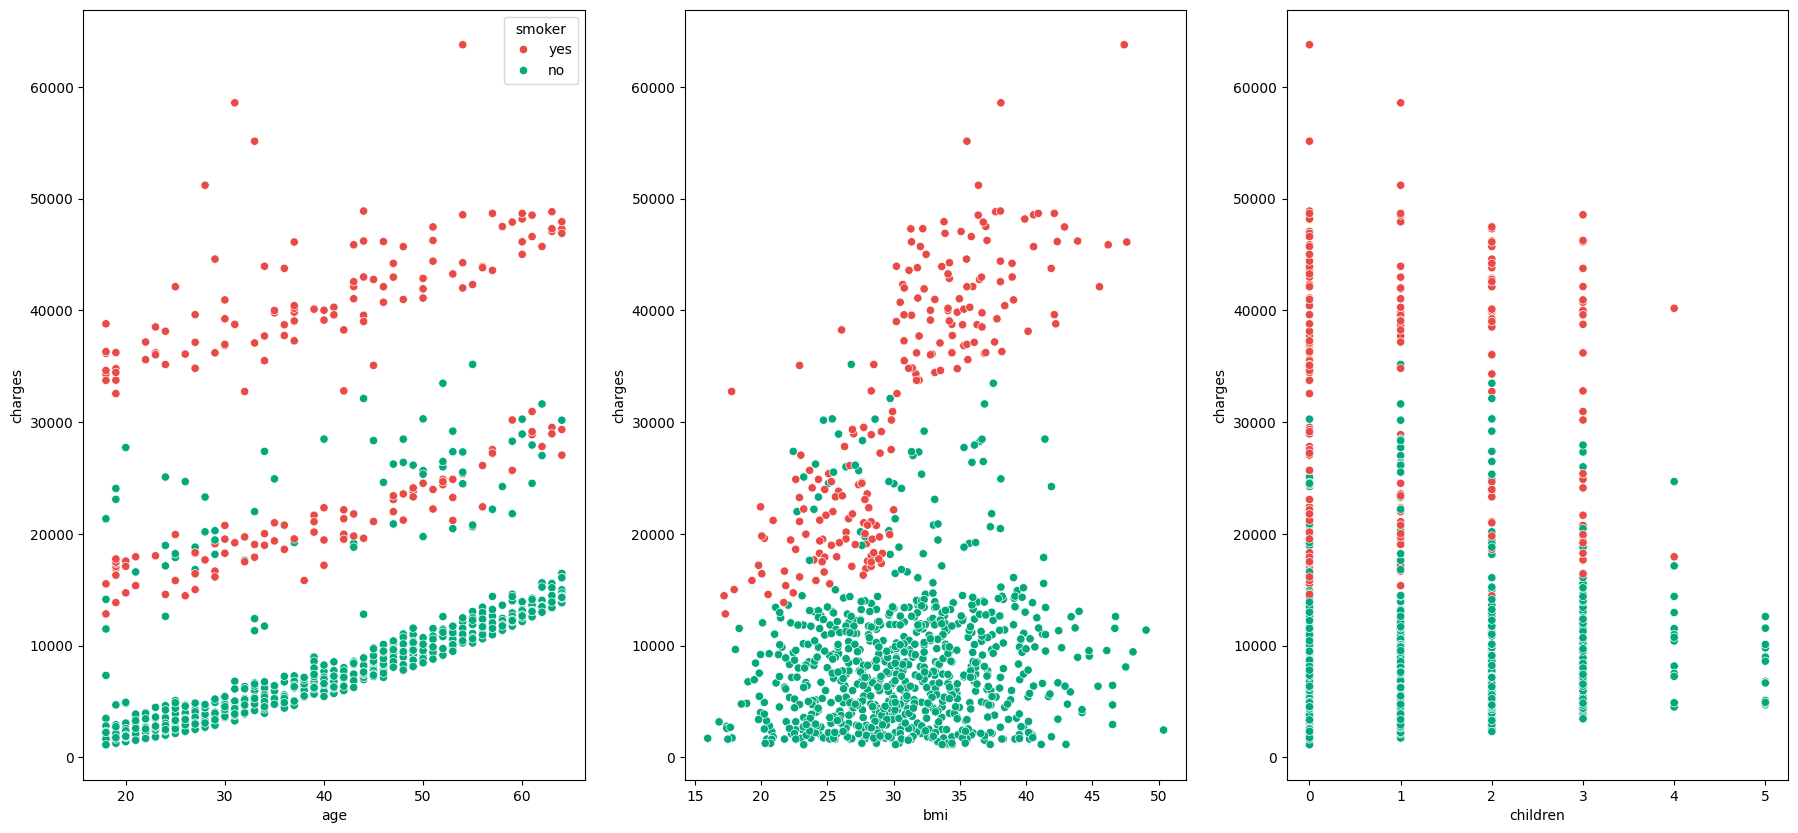

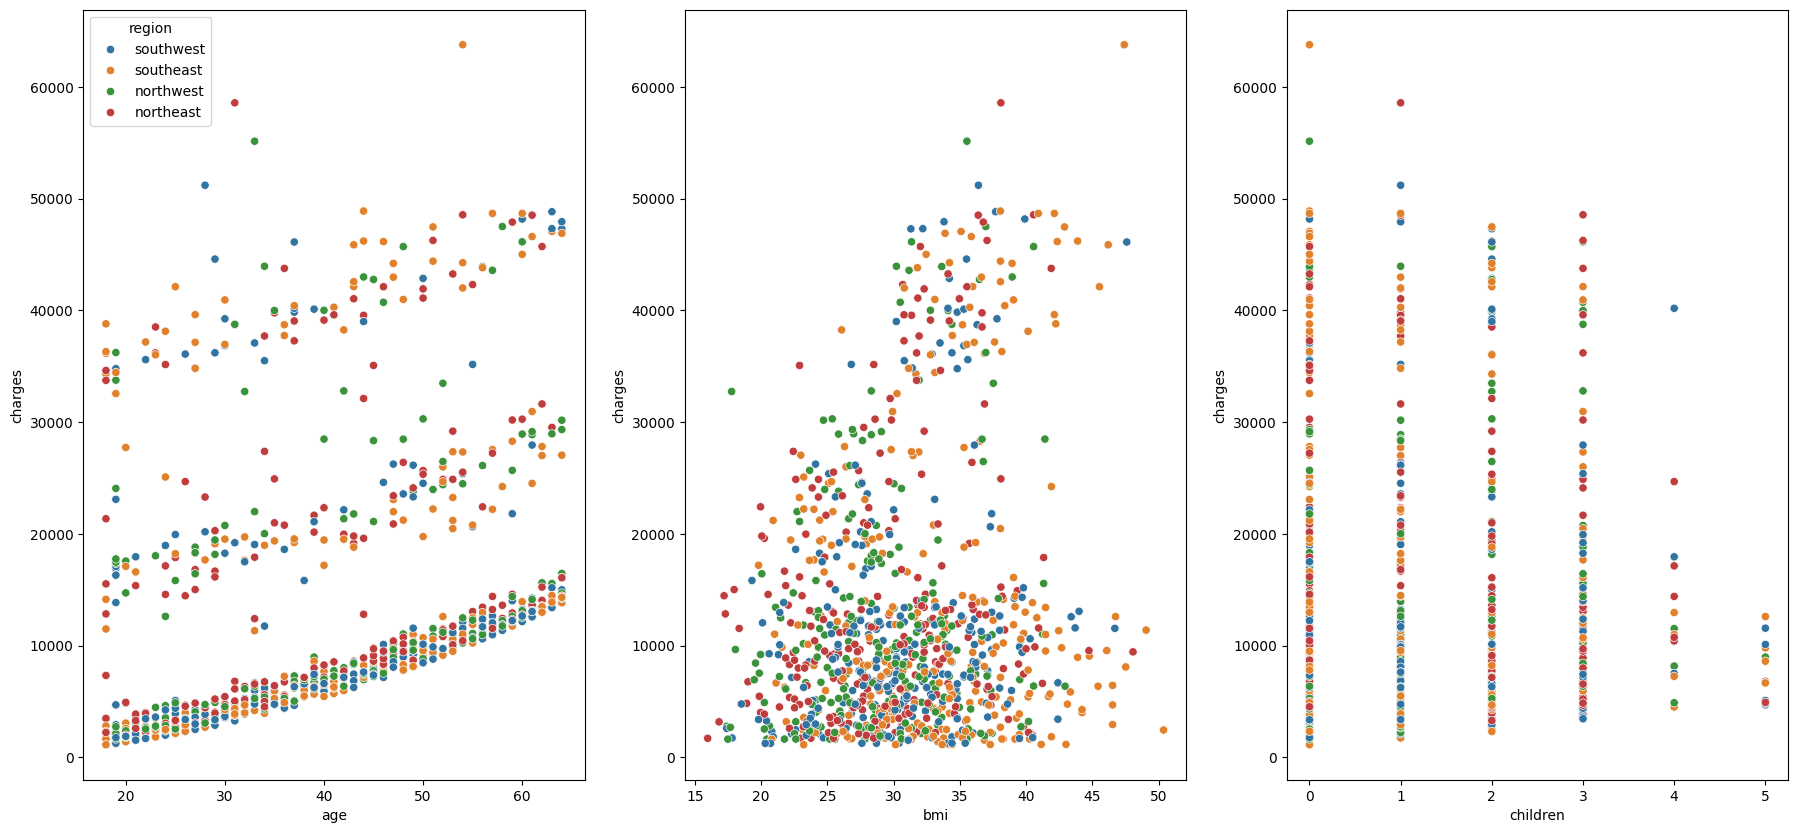

In [17]:
# Analyse bivariée entre la variable cible et les variables quantitatives
palette_col = {'sex':['#F58F8F','#86B7FE'],'smoker':['#E84A46','#04A87D'],
               'region':['#3274A1','#E1812C','#3A923A','#C03D3E']}
for _feature in cat_features:
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(22,10))
    sns.scatterplot(dataset,x='age',y='charges',hue=_feature,palette=palette_col[_feature],ax=ax1)
    sns.scatterplot(dataset,x='bmi',y='charges',hue=_feature,palette=palette_col[_feature],legend=False,ax=ax2)
    sns.scatterplot(dataset,x='children',y='charges',hue=_feature,palette=palette_col[_feature],legend=False,ax=ax3)
    fig.savefig(f'./export/bivariate_charge_{_feature}')
    


Matrice de corrélation entre les variables quantitatives : Utilisation d'une matrice de corrélation pour identifier les relations entre les variables quantitatives

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


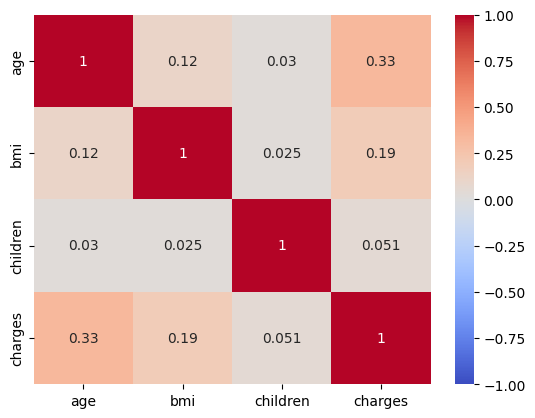

In [18]:
dataa= dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
Valeurs_quantitatives= ['age', 'bmi', 'children', 'charges']
dataset_num = dataset[Valeurs_quantitatives]

display(dataset_num.head())
cor=dataset_num.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Interprétation de l'ensemble des résultats issus de l'analyse descriptive

c. Pré-traitement des données:
Conversion des variables qualitatives en variables quantitatives

In [19]:
var_cat = ['sex','smoker','region','bmi']
var_num = ['age','children']
features = var_cat+var_num
target =  'charges'
X = dataset[features]
y = dataset[target]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80,random_state=1234)

d. Construction du premier modèle KKN
Utilisation de KNeighborsRegressor de sklearn : Pour résoudre la tâche de classification nous construisons un modèle des k-plus proches voisins. Nous entraînons le modèle sur le train set avec la méthode .fit(). Puis nous testons les performances du modèle sur le test set avec la méthode .predict(). Nous obtenons ainsi les classes prédites pour les observations de l’ensemble test. 

In [21]:
from discretize import categorize_bmi

In [22]:
transf_bmi = Pipeline([
    ('transf_bmi',FunctionTransformer(categorize_bmi)),
    ('ordenc',OrdinalEncoder())
])

cat_pipeline = ColumnTransformer([
    ('ohe',OneHotEncoder(drop=['male','no','northeast']),['sex','smoker','region']),
    ('transf_bmi',transf_bmi,['bmi'])
])

num_pipeline = ColumnTransformer([
    ('stdscaler',StandardScaler(),['age','children']),
    # ('rbstscaler',RobustScaler(),['bmi'])
])

preprocessor = ColumnTransformer([
    # ('ordenc',transf_bmi,['bmi']),
    ('categorical',cat_pipeline,var_cat),
    ('numerical',num_pipeline,var_num)
])

M0 = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn",KNeighborsRegressor())
])

In [23]:
M0.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('ohe',
                                                                                   OneHotEncoder(drop=['male',
                                                                                                       'no',
                                                                                                       'northeast']),
                                                                                   ['sex',
                                                                                    'smoker',
                                                                                    'region']),
                                                                                  ('transf_bmi',
                                                                                   Pipeline(steps=[('transf_bmi',
                                                                                                    FunctionTransformer(func=<function categorize_bmi at 0x000002C683A61800>)),
                                                                                                   ('ordenc',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['bmi'])]),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi']),
                                                 ('numerical',
                                                  ColumnTransformer(transformers=[('stdscaler',
                                                                                   StandardScaler(),
                                                                                   ['age',
                                                                                    'children'])]),
                                                  ['age', 'children'])])),
                ('knn', KNeighborsRegressor())])

In [24]:
M1 = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn",KNeighborsRegressor(n_neighbors=3))
])
M1.fit(X_train,y_train)
y2_pred = M1.predict(X_test)
root_mean_squared_error(y_test,y2_pred)

6659.885254056265

In [25]:
M2 = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn",KNeighborsRegressor(n_neighbors=7))
])
M2.fit(X_train,y_train)
y2_pred = M2.predict(X_test)
root_mean_squared_error(y_test,y2_pred)

6951.793967365446

In [26]:
M3 = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn",KNeighborsRegressor(n_neighbors=10))
])
M3.fit(X_train,y_train)
y3_pred = M3.predict(X_test)
root_mean_squared_error(y_test,y3_pred)

7546.7057896802335

In [27]:
list_models = [M0,M1,M2,M3]
model_names = ['M0','M1','M2','M3']

def classify_models(models,model_names,X_to_pred,y_true):
    metrics_model = []
    for model in models:
        metrics = {}
        metrics['MAE'] = mean_absolute_error(y_true=y_true,y_pred=model.predict(X_to_pred))
        metrics['MSE'] = mean_squared_error(y_true=y_true,y_pred=model.predict(X_to_pred))
        metrics['RMSE'] = root_mean_squared_error(y_true=y_true,y_pred=model.predict(X_to_pred))
        metrics['R2'] = r2_score(y_true=y_true,y_pred=model.predict(X_to_pred))
        metrics_model.append(metrics)
        
    df_metrics = pd.DataFrame(metrics_model,index=model_names).sort_values('R2',ascending=False)
    
    return df_metrics

In [28]:
# Performance sur le train set
df_train_perf = classify_models(list_models,model_names,X_train,y_train)

In [29]:
# Performance sur le test set
df_test_perf = classify_models(list_models,model_names,X_test,y_test)

In [30]:
df_test_perf

,MAE,MSE,RMSE,R2
M0,4062.227595,4.278856e+07,6541.296224,0.715892
M1,4114.951928,4.435407e+07,6659.885254,0.705497
M2,4280.207085,4.832744e+07,6951.793967,0.679115
M3,4618.658806,5.695277e+07,7546.705790,0.621844


In [31]:
df_train_perf['set'] = 'train'
df_test_perf['set'] = 'test'
df_perf = pd.concat([df_train_perf,df_test_perf],axis='index').reset_index()
df_perf.columns = ['model_name','MAE','MSE','RMSE','R2','set']
df_perf

,model_name,MAE,MSE,RMSE,R2,set
0,M1,2466.831149,1.964040e+07,4431.749498,0.861678,train
1,M0,3034.661622,2.715151e+07,5210.711316,0.808779,train
2,M2,3564.627938,3.576437e+07,5980.332273,0.748121,train
3,M3,4022.458352,4.398398e+07,6632.041728,0.690233,train
4,M0,4062.227595,4.278856e+07,6541.296224,0.715892,test
5,M1,4114.951928,4.435407e+07,6659.885254,0.705497,test
6,M2,4280.207085,4.832744e+07,6951.793967,0.679115,test
7,M3,4618.658806,5.695277e+07,7546.705790,0.621844,test


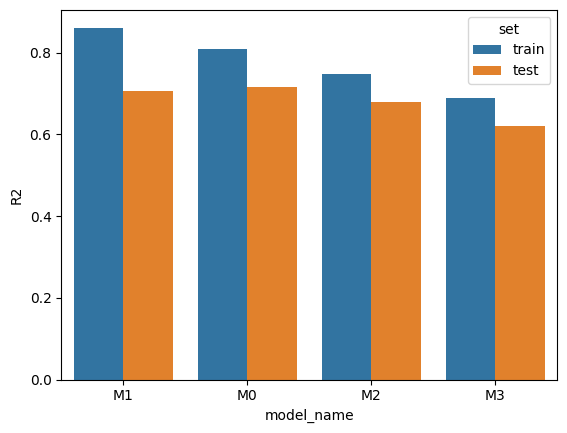

In [32]:
sns.barplot(data=df_perf,x='model_name',y='R2',hue='set');

## e

In [33]:
from sklearn.model_selection import GridSearchCV

M4 = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn",KNeighborsRegressor(n_neighbors=10))
])

param_grid = {
    "knn__weights":['uniform','distance'],
    "knn__p":[1,2],
    "knn__algorithm":['ball_tree','kd_tree','brute','auto']
}

param_search = GridSearchCV(M4,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)
param_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         ColumnTransformer(transformers=[('ohe',
                                                                                                          OneHotEncoder(drop=['male',
                                                                                                                              'no',
                                                                                                                              'northeast']),
                                                                                                          ['sex',
                                                                                                           'smoker',
                                                                                                           'region']),
                                                                                                         ('transf_bmi',
                                                                                                          Pipeline(steps=[('transf_bmi',
                                                                                                                           FunctionTransformer(func=<function categorize_bmi at 0x000002C683A61800>)),
                                                                                                                          ('ordenc',
                                                                                                                           Ordi...
                                                                          'smoker',
                                                                          'region',
                                                                          'bmi']),
                                                                        ('numerical',
                                                                         ColumnTransformer(transformers=[('stdscaler',
                                                                                                          StandardScaler(),
                                                                                                          ['age',
                                                                                                           'children'])]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=10))]),
             param_grid={'knn__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                            'auto'],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [34]:
param_search.best_params_

{'knn__algorithm': 'kd_tree', 'knn__p': 1, 'knn__weights': 'distance'}

In [35]:
RMSE0 = round(df_test_perf.loc['M0','R2'],2)
RMSE4 = round(r2_score(y_test,param_search.predict(X_test)),2)

print("R2 par défaut:",RMSE0)
print("R2 GridSearch:",RMSE4)

R2 par défaut: 0.72
R2 GridSearch: 0.74


In [36]:
model_opt = param_search.best_estimator_

## f

In [37]:
y_pred_opt = model_opt.predict(X_test)

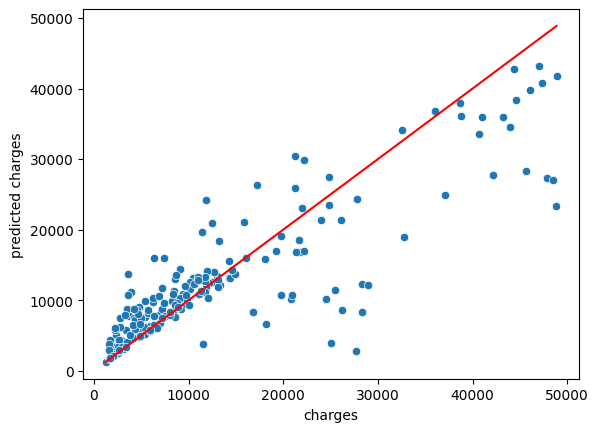

In [38]:
sns.scatterplot(x=y_test,y=y_pred_opt)
sns.lineplot(x=[min(y_test), max(y_test)],y=[min(y_test), max(y_test)],color='red')
plt.xlabel('charges')
plt.ylabel('predicted charges');

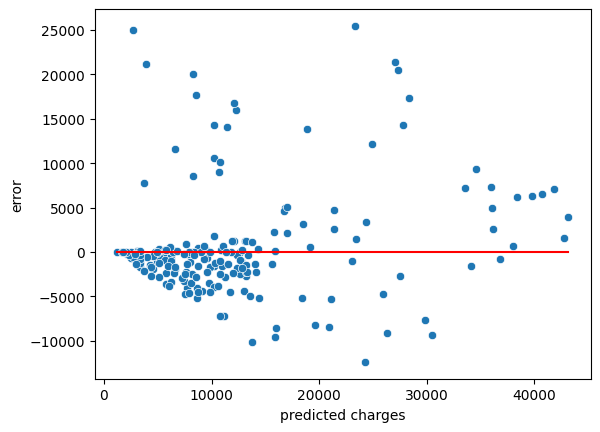

In [39]:
sns.scatterplot(x=y_pred_opt,y=y_test-y_pred_opt)
sns.lineplot(x=[min(y_pred_opt), max(y_pred_opt)],y=[0, 0],color='red')
plt.xlabel('predicted charges')
plt.ylabel('error');
# sns.lineplot(x=[min(y_test), max(y_test)],y=[min(y_test), max(y_test)],color='red');

## g

## h) Utilisation du modèle optimal pour la prédiction sur la nouvelle vague de clients

In [40]:
new_data = pd.read_excel('Insurance-data.xlsx',sheet_name='PREDICT')
new_data.info()
new_data.drop(columns='a', inplace=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       338 non-null    int64  
 1   sex       338 non-null    object 
 2   bmi       338 non-null    float64
 3   children  338 non-null    int64  
 4   smoker    338 non-null    object 
 5   region    338 non-null    object 
 6   a         0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 18.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       338 non-null    int64  
 1   sex       338 non-null    object 
 2   bmi       338 non-null    float64
 3   children  338 non-null    int64  
 4   smoker    338 non-null    object 
 5   region    338 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ KB


In [41]:
predictions = model_opt.predict(new_data)
new_data['charges_predict'] = predictions
new_data

,age,sex,bmi,children,smoker,region,charges_predict
0,36,female,26.885,0,no,northwest,5266.365600
1,30,male,22.990,2,yes,northwest,16145.023890
2,24,male,32.700,0,yes,southwest,32189.877577
3,24,male,25.800,0,no,southwest,1977.815000
4,48,male,29.600,0,no,southwest,14099.599992
...,...,...,...,...,...,...,...
333,52,female,44.700,3,no,southwest,11201.000339
334,50,male,30.970,3,no,northwest,10635.641937
335,18,female,31.920,0,no,northeast,6036.949590
336,18,female,36.850,0,no,southeast,3714.388925


# Partie 2

In [42]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

### Regression linéaire

In [43]:
reglin = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("reg",LinearRegression())
])

reglin.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('ohe',
                                                                                   OneHotEncoder(drop=['male',
                                                                                                       'no',
                                                                                                       'northeast']),
                                                                                   ['sex',
                                                                                    'smoker',
                                                                                    'region']),
                                                                                  ('transf_bmi',
                                                                                   Pipeline(steps=[('transf_bmi',
                                                                                                    FunctionTransformer(func=<function categorize_bmi at 0x000002C683A61800>)),
                                                                                                   ('ordenc',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['bmi'])]),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi']),
                                                 ('numerical',
                                                  ColumnTransformer(transformers=[('stdscaler',
                                                                                   StandardScaler(),
                                                                                   ['age',
                                                                                    'children'])]),
                                                  ['age', 'children'])])),
                ('reg', LinearRegression())])

### Ridge regression

In [44]:
ridge0 =  Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("ridge",Ridge())
])

ridge0.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('ohe',
                                                                                   OneHotEncoder(drop=['male',
                                                                                                       'no',
                                                                                                       'northeast']),
                                                                                   ['sex',
                                                                                    'smoker',
                                                                                    'region']),
                                                                                  ('transf_bmi',
                                                                                   Pipeline(steps=[('transf_bmi',
                                                                                                    FunctionTransformer(func=<function categorize_bmi at 0x000002C683A61800>)),
                                                                                                   ('ordenc',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['bmi'])]),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi']),
                                                 ('numerical',
                                                  ColumnTransformer(transformers=[('stdscaler',
                                                                                   StandardScaler(),
                                                                                   ['age',
                                                                                    'children'])]),
                                                  ['age', 'children'])])),
                ('ridge', Ridge())])

In [45]:
ridge_search = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("ridge",Ridge())
])

param_grid = {
    "ridge__alpha":np.arange(0,1,0.01),
}

param_search_ridge = GridSearchCV(ridge_search,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)
param_search_ridge.fit(X_train,y_train)

best_ridge = param_search_ridge.best_estimator_

### RandomForestRegressor

In [46]:
rfr0 =  Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("rdmforreg",RandomForestRegressor())
])

rfr0.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('ohe',
                                                                                   OneHotEncoder(drop=['male',
                                                                                                       'no',
                                                                                                       'northeast']),
                                                                                   ['sex',
                                                                                    'smoker',
                                                                                    'region']),
                                                                                  ('transf_bmi',
                                                                                   Pipeline(steps=[('transf_bmi',
                                                                                                    FunctionTransformer(func=<function categorize_bmi at 0x000002C683A61800>)),
                                                                                                   ('ordenc',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['bmi'])]),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi']),
                                                 ('numerical',
                                                  ColumnTransformer(transformers=[('stdscaler',
                                                                                   StandardScaler(),
                                                                                   ['age',
                                                                                    'children'])]),
                                                  ['age', 'children'])])),
                ('rdmforreg', RandomForestRegressor())])

In [47]:
rfr_search = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("rfr",RandomForestRegressor())
])

param_grid = {
    "rfr__max_depth":np.arange(0,10),
    "rfr__max_leaf_nodes":np.arange(0,10)
}

param_search_rfr = GridSearchCV(rfr_search,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)
param_search_rfr.fit(X_train,y_train)

best_rfr = param_search_rfr.best_estimator_

### SVR

In [48]:
svr0 =  Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("svr",SVR())
])

svr0.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  ColumnTransformer(transformers=[('ohe',
                                                                                   OneHotEncoder(drop=['male',
                                                                                                       'no',
                                                                                                       'northeast']),
                                                                                   ['sex',
                                                                                    'smoker',
                                                                                    'region']),
                                                                                  ('transf_bmi',
                                                                                   Pipeline(steps=[('transf_bmi',
                                                                                                    FunctionTransformer(func=<function categorize_bmi at 0x000002C683A61800>)),
                                                                                                   ('ordenc',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['bmi'])]),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi']),
                                                 ('numerical',
                                                  ColumnTransformer(transformers=[('stdscaler',
                                                                                   StandardScaler(),
                                                                                   ['age',
                                                                                    'children'])]),
                                                  ['age', 'children'])])),
                ('svr', SVR())])

In [49]:
svr_search = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("svr",SVR())
])

param_grid = {
    "svr__kernel":['linear','poly','rbf','sigmoid','precomputed'],
    "svr__C":np.arange(0,10,0.5)
}

param_search_svr = GridSearchCV(svr_search,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)
param_search_svr.fit(X_train,y_train)

best_svr = param_search_svr.best_estimator_

### Gradient Boosting

In [50]:
gbo_search = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("gbo",GradientBoostingRegressor())
])

param_grid = {
    "gbo__subsample":np.arange(0,1,0.1),
    "gbo__max_depth":np.arange(0,10)
}

param_search_gbo = GridSearchCV(gbo_search,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)
param_search_gbo.fit(X_train,y_train)

best_gbo = param_search_gbo.best_estimator_

In [51]:
models = [model_opt,reglin,best_ridge,best_rfr,best_svr,best_gbo]
model_names = ['KNN','LinearRegression','Ridge','RandomForest','SVR','GradientBoosting']

classify_models(models,model_names,X_test,y_test)

,MAE,MSE,RMSE,R2
RandomForest,2534.961172,1.937425e+07,4401.619412,0.871359
GradientBoosting,2415.212307,1.998606e+07,4470.577045,0.867296
KNN,3727.074755,3.881005e+07,6229.771531,0.742308
Ridge,4061.793786,4.107813e+07,6409.222365,0.727249
LinearRegression,4042.590339,4.108727e+07,6409.935458,0.727188
SVR,6729.186571,1.504322e+08,12265.079616,0.001158


Le meilleur modèle est le RandomForest avec un RMSE=*4393.83* et $R^2=87.18\%$

In [52]:
import joblib

joblib.dump(best_rfr,'./best_model.sav')

['./best_model.sav']

In [63]:
best_rfr.predict(pd.DataFrame({'age':[17],'bmi':[15],'children':[4],'sex':['female'],'smoker':['yes'],'region':['northeast']}))

array([19971.25053851])